In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("telecom data.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Preprocessing !

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = df['tenure'].astype(float)

In [8]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)
df['SeniorCitizen']=df['SeniorCitizen'].apply(lambda x: "Yes" if x== 1 else "No")

In [9]:
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}

df["PaymentMethod"].replace(payment_column, inplace=True)


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df=df.dropna()

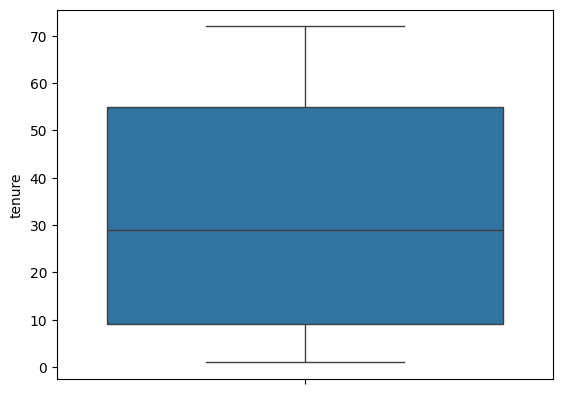

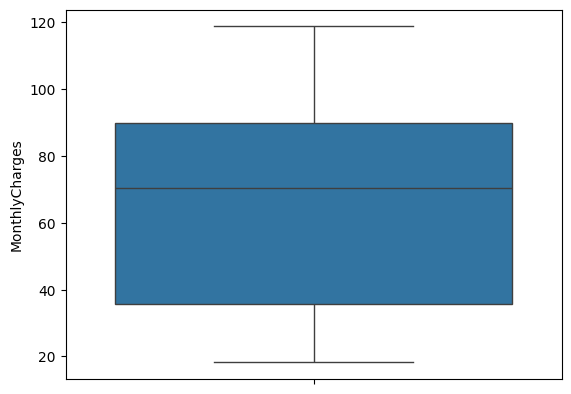

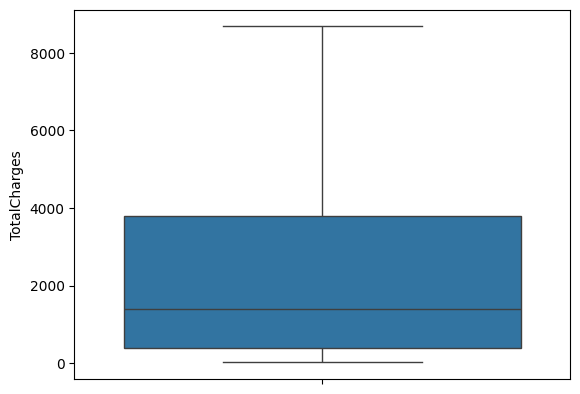

In [12]:
for x in df.select_dtypes(include=['int64','float64']).columns:
    plt.subplots()
    sns.boxplot(df[x])
plt.show()


In [13]:
# Label encoding for binary categorical columns.
features_le = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return

label_encoding(['SeniorCitizen','Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)

In [14]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [15]:
# One-Hot-Encoding for remaining categorical columns
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaymentMethod']

# # Apply one-hot encoding directly using pandas.get_dummies
df = pd.get_dummies(df, columns=features_ohe)

In [16]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check
0,7590-VHVEG,1,0,1,0,1.0,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34.0,1,0,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,2.0,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45.0,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,1,0,0,0,2.0,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


In [18]:
df_permutated = df.sample(frac=1)
train_size = 0.66
train_end = int(len(df)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [19]:
from sklearn.preprocessing import MinMaxScaler
def norm(df):
    features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
    df_features_mms = pd.DataFrame(df, columns=features_mms)
    df_remaining_features = df.drop(columns=features_mms)

    mms = MinMaxScaler()
    rescaled_features = mms.fit_transform(df_features_mms)

    df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

    df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)
    return df

df_train=norm(df_train)
df_test=norm(df_test)


In [20]:
df_test.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges
count,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000
mean,0.484734,0.148892,0.484734,0.291928,0.904642,0.591384,0.263070,0.442375,0.467397,0.264775
std,0.499871,0.356056,0.499871,0.454744,0.293770,0.491681,0.440392,0.347736,0.302833,0.267103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.098592,0.170574,0.040982
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.394366,0.522195,0.159538
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.774648,0.715711,0.443142
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_train.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges
count,4641.000000,4641.00000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,0.500754,0.16936,0.481362,0.301875,0.902607,0.593407,0.267184,0.442656,0.460817,0.259891
std,0.500053,0.37511,0.499706,0.459121,0.296524,0.491251,0.442537,0.344696,0.297959,0.259055
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.112676,0.173632,0.045888
50%,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.394366,0.516418,0.158979
75%,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.760563,0.710945,0.432910
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Splitting into train test data

In [23]:
X_train = df_train.drop(columns=["Churn","customerID"])
y_train = df_train["Churn"]

In [24]:
X_test = df_test.drop(columns=["Churn","customerID"])
y_test = df_test["Churn"]

In [25]:
X_train.shape,X_test.shape

((4641, 40), (2391, 40))

In [26]:
# Traning

In [27]:
# y = df_train['Churn']
# y

In [28]:
# x = df_train.drop(columns=['Churn'])

In [29]:
# x

In [30]:
# from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test = train_test_split(x,y,0.34)

In [31]:
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
# Metrics
from sklearn.metrics import roc_auc_score, f1_score , accuracy_score

In [33]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

In [35]:
# Measuring accuracy
acc_score = accuracy_score(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
_knn = [acc_score,auc_score,f1]

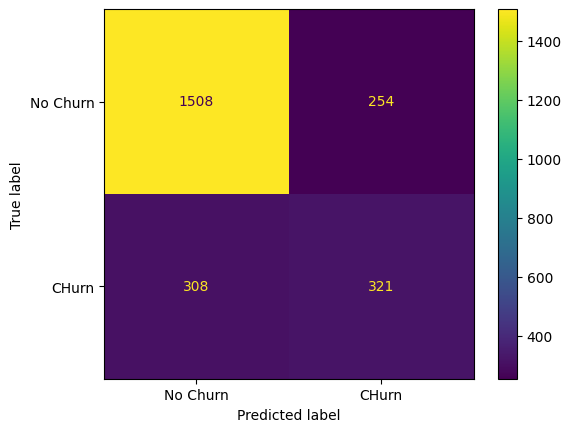

In [36]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Churn", "Churn"])

cm_display.plot()
plt.show()

In [37]:
print(f"Accuracy : {acc_score}")
print(f"auc_score : {auc_score}")
print(f"f1_score : {f1}")

Accuracy : 0.7649519029694688
auc_score : 0.6830897466204937
f1_score : 0.5332225913621262


In [38]:
# Logistic reg
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)

In [39]:
acc_score = accuracy_score(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
_lr = [acc_score,auc_score,f1]

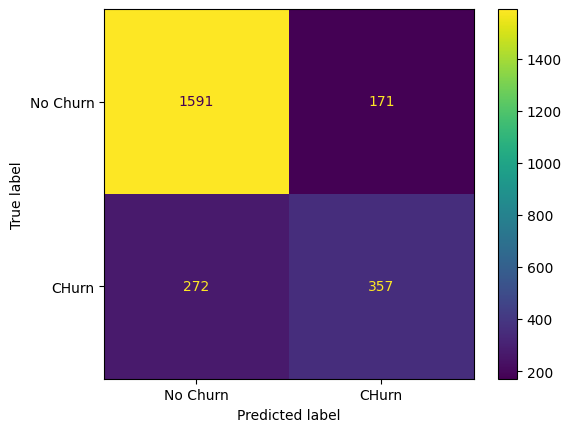

In [40]:
# from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Churn", "Churn"])

cm_display.plot()
plt.show()

In [41]:
print(f"Accuracy : {acc_score}")
print(f"auc_score : {auc_score}")
print(f"f1_score : {f1}")

Accuracy : 0.8147218736930155
auc_score : 0.7352593796975181
f1_score : 0.6171132238547969


In [42]:
# Decision tree

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)

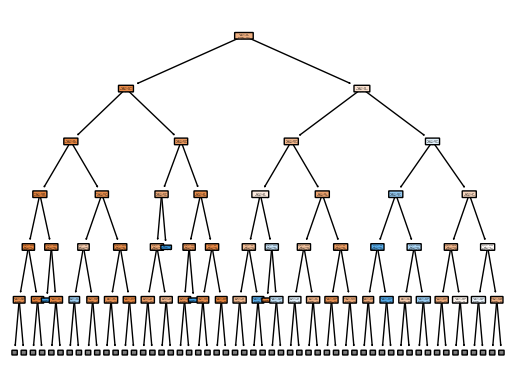

In [44]:
from sklearn import tree
tree.plot_tree(dt,max_depth=5,filled=True,rounded=True)
plt.show()

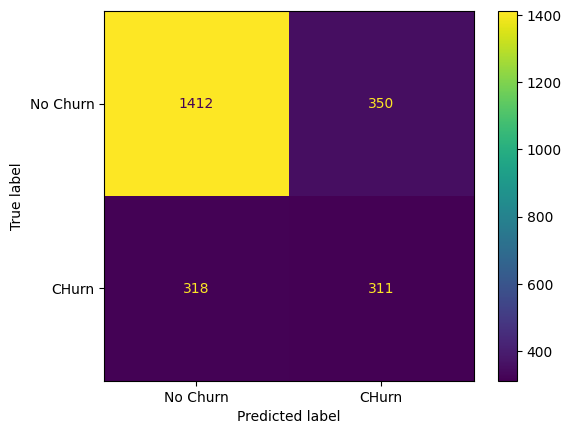

In [45]:
# from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Churn", "Churn"])

cm_display.plot()
plt.show()

In [46]:
acc_score = accuracy_score(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
_dt = [acc_score,auc_score,f1]

In [47]:
print(f"Accuracy : {acc_score}")
print(f"auc_score : {auc_score}")
print(f"f1_score : {f1}")

Accuracy : 0.7206189878711836
auc_score : 0.6478988503092129
f1_score : 0.4821705426356589


In [48]:
# Naive bayes

In [49]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)

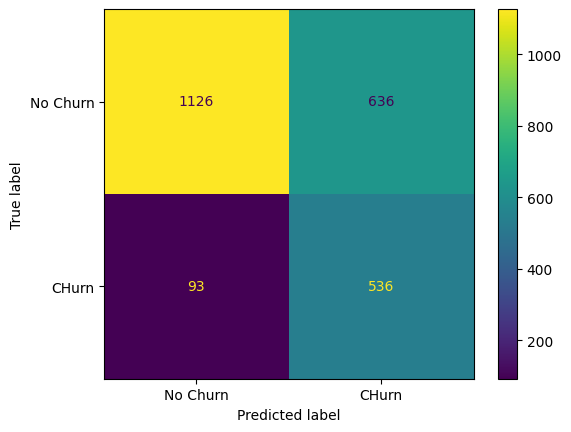

In [50]:
# from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Churn", "Churn"])

cm_display.plot()
plt.show()

In [51]:
acc_score = accuracy_score(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
_nb = [acc_score,auc_score,f1]
_nb

[0.6951066499372648, 0.7455964009679708, 0.5952248750694059]

In [52]:
print(f"Accuracy : {acc_score}")
print(f"auc_score : {auc_score}")
print(f"f1_score : {f1}")

Accuracy : 0.6951066499372648
auc_score : 0.7455964009679708
f1_score : 0.5952248750694059


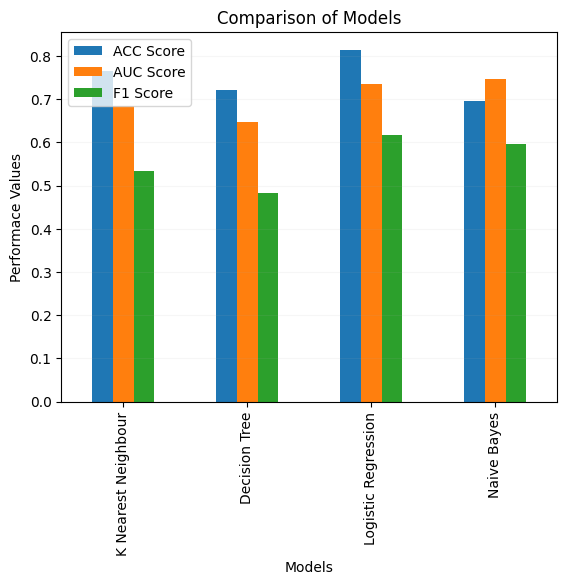

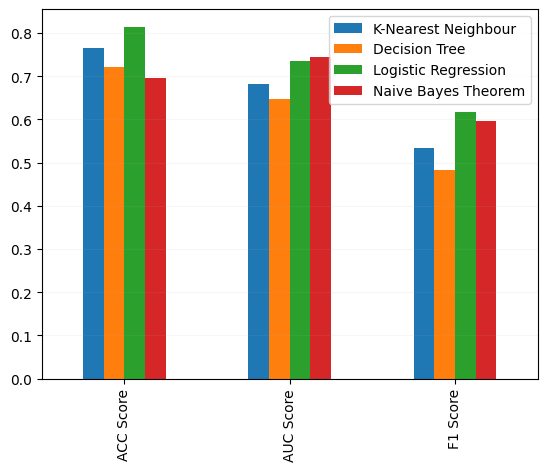

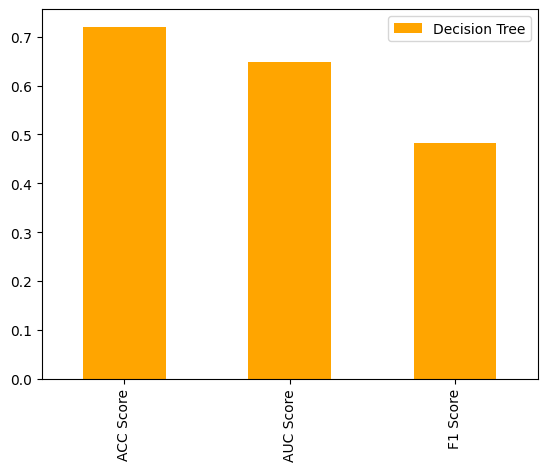

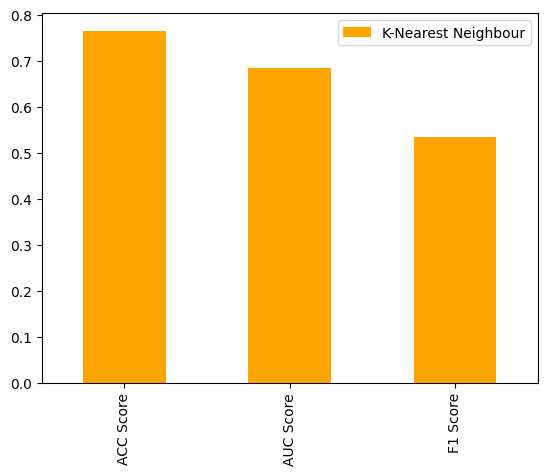

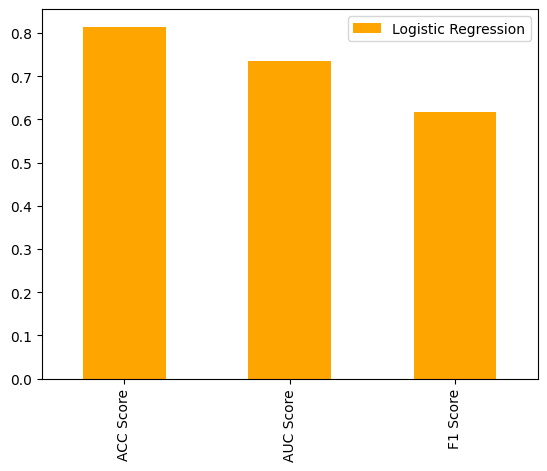

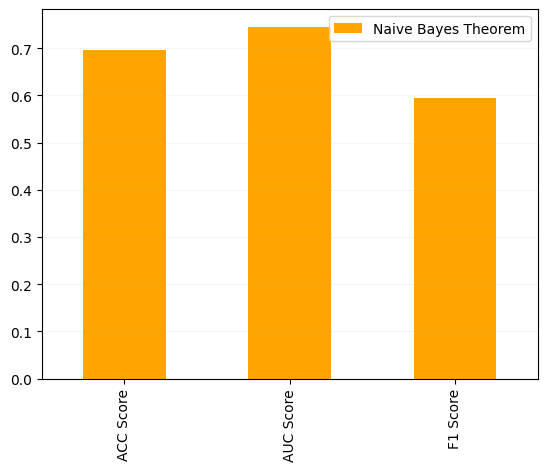

In [53]:
a1 = [_knn[0], _dt[0], _lr[0], _nb[0]] 
a2 = [_knn[1], _dt[1], _lr[1], _nb[1]]
a3 = [_knn[2], _dt[2], _lr[2], _nb[2]]
        
data1 = {"ACC Score":a1,"AUC Score":a2,"F1 Score":a3,}

data2 = {"K-Nearest Neighbour" : _knn,"Decision Tree":_dt,"Logistic Regression":_lr,"Naive Bayes Theorem":_nb}

models = ["K Nearest Neighbour","Decision Tree","Logistic Regression","Naive Baye"]

metrics = ["ACC Score","AUC Score","F1 Score"]

scores1 = pd.DataFrame(
    data=data1,index=["K Nearest Neighbour","Decision Tree","Logistic Regression","Naive Bayes"]
)

scores2 = pd.DataFrame(
    data=data2,index=["ACC Score","AUC Score","F1 Score"]
)

grouped = scores2.groupby(models,axis=1)

scores1.plot.bar(title = "Comparison of Models",xlabel ="Models",ylabel = "Performace Values")
plt.grid(True,axis='y',zorder = -2,alpha = 0.1)
scores2.plot.bar()
plt.grid(True,axis='y',zorder = -2,alpha = 0.1)
grouped.plot.bar(color = 'orange')
plt.grid(True,axis='y',zorder = -2,alpha = 0.1)